In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# importing Disney stock history, Jan. 4, 2010 to July 13, 2020
dis = pd.read_csv('DIS.csv',parse_dates=['Date'])
amc = pd.read_csv('AMC.csv',parse_dates=['Date'])
dis

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,32.500000,32.750000,31.870001,32.070000,27.933924,13700400
1,2010-01-05,32.070000,32.160000,31.700001,31.990000,27.864237,10307700
2,2010-01-06,31.900000,32.000000,31.680000,31.820000,27.716166,10709500
3,2010-01-07,31.770000,31.860001,31.540001,31.830000,27.724878,8202100
4,2010-01-08,31.660000,31.940001,31.530001,31.879999,27.768419,7657500
...,...,...,...,...,...,...,...
2644,2020-07-07,113.629997,115.080002,112.610001,113.629997,113.629997,10836500
2645,2020-07-08,113.480003,117.129997,112.809998,116.660004,116.660004,13629500
2646,2020-07-09,116.510002,117.849998,115.379997,116.809998,116.809998,13582900
2647,2020-07-10,116.830002,119.440002,116.209999,119.339996,119.339996,14207900


In [3]:
# compiling Disney releases, including Marvel Studios
releases = pd.DataFrame()
decades = ['2010','2020']
for d in decades:
    releases_dec = pd.read_csv(f'disney_{d}.csv',names=['Type','Title','US_Release','Production_Companies'],header=0,
                              usecols=['Title','US_Release','Production_Companies'],parse_dates=['US_Release'])
    releases = pd.concat([releases,releases_dec],ignore_index=True)
marvel = pd.read_csv('marvel.csv',names=['Title','US_Release','Production_Companies'],header=0,parse_dates=['US_Release'])
releases = pd.concat([releases,marvel],ignore_index=True)
# print(releases.US_Release[0])
# datetime.datetime.strptime(releases.US_Release,'%d-%b-%y')
# releases['US_Release'] = releases['US_Release'].astype('datetime64[D]')
releases.sort_values('US_Release',inplace=True,ignore_index=True)
releases

,Title,US_Release,Production_Companies
0,Alice in Wonderland,2010-03-05,"The Zanuck Company, Roth Films and Team Todd"
1,Waking Sleeping Beauty,2010-03-26,Stone Circle Pictures
2,Oceans,2010-04-22,Participant Media
3,Iron Man 2,2010-05-07,Marvel Studios
4,Prince of Persia: The Sands of Time,2010-05-28,Jerry Bruckheimer Films
...,...,...,...
113,Stargirl,2020-03-13,Gotham Group and Hahnscape Entertainment
114,Elephant,2020-04-03,Disneynature
115,Dolphin Reef,2020-04-03,Disneynature
116,Artemis Fowl,2020-06-12,TriBeCa Productions and Marzano Films


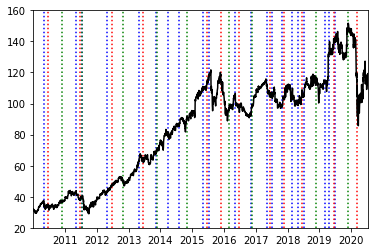

In [4]:
# plotting Disney stock price over the past decade, with vertical lines representing "major" Disney releases
# (Disney, Pixar, Marvel)
plt.plot(dis.Date,dis.Close,'k-')
plt.vlines(releases.loc[releases.Production_Companies=='Marvel Studios'].US_Release,20,160,linestyles='dotted',colors='b')
plt.vlines(releases.loc[releases.Production_Companies=='Pixar Animation Studios'].US_Release,20,160,
           linestyles='dotted',colors='r')
plt.vlines(releases.loc[releases.Production_Companies=='Walt Disney Animation Studios'].US_Release,20,160,
           linestyles='dotted',colors='g')
plt.axis([dis.Date.min(),dis.Date.max(),20,160])
plt.show()

In [5]:
# calculating days until major Disney release and stock price 1 week later
# def nearest(items, target):
#     return min(items, key = lambda x: abs(x-target))
# dis['Disneyless_Days'] = [releases.loc[releases.US_Release>date].US_Release.iloc[0] - date for date in dis.Date]

dis['days_until'] = np.nan
dis['days_since'] = np.nan
dis['three_weeks'] = np.nan
for ind in dis.index:
    try:
        until = releases.loc[releases.US_Release > dis.loc[ind,'Date']].US_Release.iloc[0] - dis.loc[ind,'Date']
        until = until.days
        dis.loc[ind,'days_until'] = until
    except:
        pass
    try:
        since = dis.loc[ind,'Date'] - releases.loc[releases.US_Release < dis.loc[ind,'Date']].US_Release.iloc[-1]
        since = since.days
        dis.loc[ind,'days_since'] = since
    except:
        pass
    try:
        dis.loc[ind,'three_weeks'] = dis.loc[ind+21,'Open']
    except:
        pass

In [6]:
dis

,Date,Open,High,Low,Close,Adj Close,Volume,days_until,days_since,three_weeks
0,2010-01-04,32.500000,32.750000,31.870001,32.070000,27.933924,13700400,60.0,NaN,29.920000
1,2010-01-05,32.070000,32.160000,31.700001,31.990000,27.864237,10307700,59.0,NaN,30.280001
2,2010-01-06,31.900000,32.000000,31.680000,31.820000,27.716166,10709500,58.0,NaN,29.629999
3,2010-01-07,31.770000,31.860001,31.540001,31.830000,27.724878,8202100,57.0,NaN,29.760000
4,2010-01-08,31.660000,31.940001,31.530001,31.879999,27.768419,7657500,56.0,NaN,29.889999
...,...,...,...,...,...,...,...,...,...,...
2644,2020-07-07,113.629997,115.080002,112.610001,113.629997,113.629997,10836500,NaN,4.0,NaN
2645,2020-07-08,113.480003,117.129997,112.809998,116.660004,116.660004,13629500,NaN,5.0,NaN
2646,2020-07-09,116.510002,117.849998,115.379997,116.809998,116.809998,13582900,NaN,6.0,NaN
2647,2020-07-10,116.830002,119.440002,116.209999,119.339996,119.339996,14207900,NaN,7.0,NaN


In [7]:
# building the AMC dataframe from the DIS data
try:
    dis['Date'] = dis['Date'].map(dt.datetime.toordinal)
except:
    pass
try:
    amc['Date'] = amc['Date'].map(dt.datetime.toordinal)
except:
    pass
df = dis.loc[dis.Date>=amc.Date.iloc[0]].reset_index()
amc['dis_open'] = df.Open
amc['days_until'] = df.days_until
amc['days_since'] = df.days_since
amc['three_weeks'] = np.nan
amc['dis_three_weeks'] = np.nan
for ind in amc.index:
    try:
        amc.loc[ind,'three_weeks'] = amc.loc[ind+21,'Open']
    except:
        pass
    try:
        amc.loc[ind,'dis_three_weeks'] = dis.loc[ind+21,'Open']
    except:
        pass

In [8]:
# defining dataset independent & dependent variables
try:
    dis['Date'] = dis['Date'].map(dt.datetime.toordinal)
except:
    pass
dataset = amc
x = dataset.dropna().drop(['Low','Volume','Close','Adj Close','three_weeks','dis_three_weeks','dis_open','days_until','days_since'],axis=1)
y = dataset.dropna()['three_weeks']
print(len(x),len(y))

1631 1631


In [9]:
# train/test split and converting dates into numerical values
# x_train, x_test, y_train, y_test = train_test_split(dataset,valid,test_size=0.2)
split = int(len(x)*0.8)
x_train = x.iloc[:split]
y_train = y.iloc[:split]
x_test = x.iloc[split:]
y_test = y.iloc[split:]

In [10]:
# creating and fitting model
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [11]:
predictions = lm.predict(x_test)
# predictions

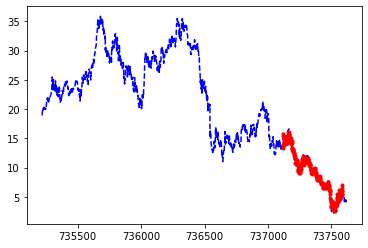

Score: 0.8008932613543684


In [12]:
plt.plot(amc.Date,amc.Close,'b--')
plt.plot(dataset.dropna().Date.iloc[split:],predictions,'r.')
plt.show()
print('Score:',model.score(x_test,y_test))